# <p style="background-color:#012D86; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Breast Cancer Risk Prediction</p>

## Problem Statement

This project aims to deepen the understanding of breast cancer survival trends and enhance prediction models for patient outcomes. By leveraging advanced statistical techniques and machine learning, the project seeks to analyze survival rates and accurately predict the 10-year mortality risk for breast cancer patients. The ultimate objective is to improve treatment planning, patient counseling, and overall cancer care strategies.

## About the dataset

**Patient ID**: Unique identifier for each patient.

**Age at Diagnosis**: Age of the patient when diagnosed with cancer.

**Type of Breast Surgery**: The type of surgery performed on the breast, such as mastectomy or lumpectomy.

**Cancer Type**: General classification of the cancer type (e.g., invasive ductal carcinoma).

**Cancer Type Detailed**: More specific classification of the cancer type.

**Cellularity**: The degree of cellularity of the tumor, often used in pathology to describe the proportion of cells versus other components in a tissue sample.

**Chemotherapy**: Indicates whether the patient received chemotherapy (Yes/No).

**Pam50 + Claudin-low subtype**: Subtypes based on gene expression profiling, including Pam50 and Claudin-low classifications.

**Cohort**: The group or study cohort to which the patient belongs.

**ER status measured by IHC**: Estrogen receptor status as measured by Immunohistochemistry (IHC) (e.g., positive or negative).

**ER Status**: Estrogen receptor status (e.g., positive, negative).

**Neoplasm Histologic Grade**: Histologic grade of the neoplasm, indicating how much the tumor cells differ from normal cells.

**HER2 status measured by SNP6**: HER2 (human epidermal growth factor receptor 2) status measured by SNP (single nucleotide polymorphism) analysis.

**HER2 Status**: HER2 receptor status (e.g., positive, negative).

**Tumor Other Histologic Subtype**: Other histologic subtypes of the tumor not covered by main classifications.

**Hormone Therapy**: Indicates whether the patient received hormone therapy (Yes/No).

**Inferred Menopausal State**: Menopausal state inferred based on age and clinical criteria (e.g., premenopausal, postmenopausal).

**Integrative Cluster**: Classification based on integrative clustering of genomic data.

**Primary Tumor Laterality**: The side of the body where the primary tumor is located (left or right).

**Lymph nodes examined positive**: Number of lymph nodes that tested positive for cancer.

**Mutation Count**: Total number of genetic mutations identified in the tumor.

**Nottingham prognostic index**: Prognostic score based on tumor size, lymph node status, and histologic grade.

**Oncotree Code**: A code that represents the type of cancer based on the OncoTree classification.

**Overall Survival (Months)**: The overall survival time of the patient in months.

**Overall Survival Status**: Indicates whether the patient is alive or deceased.

**PR Status**: Progesterone receptor status (e.g., positive, negative).

**Radio Therapy**: Indicates whether the patient received radiotherapy (Yes/No).

**Relapse Free Status (Months)**: Time in months the patient remained free from cancer relapse.

**Relapse Free Status**: Indicates whether the patient has had a relapse of cancer (Yes/No).

**Sex**: The sex of the patient (male or female).

**3-Gene classifier subtype**: Subtypes based on the expression of three specific genes.

**Tumor Size**: Size of the primary tumor.

**Tumor Stage**: Stage of the tumor, indicating the extent of cancer spread.

**Patient's Vital Status**: Indicates whether the patient is alive or deceased at the last follow-up.


<a id="read"></a>
# <p style="background-color:#012D86 ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 |  Import Libraries</p>

In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn .metrics import roc_auc_score


<a id="read"></a>
# <p style="background-color:#012D86 ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

In [2]:
df_breastcancer = pd.read_csv("Breast Cancer METABRIC.csv")
df_breastcancer.head()

Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
0                 claudin-low     1.0                   Positve  ...   
1                        LumA     1.0                   Positve  ...   
2                        LumB     1.0                   Positve  ...   
3                        LumB     1.0                   Positve  ...   
4                        LumB     1.0                   Positve  ...   

  Overall Survival Status  PR Status Radio Therapy  \
0                  Living   Negative           Yes   
1                  Living   Positive           Yes   
2                Deceased   Positive            No   
3                  Living   Positive           Yes   
4                Deceased   Positive           Yes   

  Relapse Free Status (Months) Relapse Free Status     Sex  \
0                       138.65        Not Recurred  Female   
1                        83.52        Not Recurred  Female   
2                       151.28            Recurred  Female   
3                       162.76        Not Recurred  Female   
4                        18.55            Recurred  Female   

  3-Gene classifier subtype Tumor Size Tumor Stage  Patient's Vital Status  
0                 ER-/HER2-       22.0         2.0                  Living  
1     ER+/HER2- High Prolif       10.0         1.0                  Living  
2                       NaN       15.0         2.0         Died of Disease  
3                       NaN       25.0         2.0                  Living  
4     ER+/HER2- High Prolif       40.0         2.0         Died of Disease  

[5 rows x 34 columns]

In [3]:
df_breastcancer.tail()

Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
2504  MTS-T2428             70.05                    NaN  Breast Cancer   
2505  MTS-T2429             63.60                    NaN  Breast Cancer   
2506  MTS-T2430               NaN                    NaN  Breast Cancer   
2507  MTS-T2431               NaN                    NaN  Breast Cancer   
2508  MTS-T2432               NaN                    NaN  Breast Cancer   

           Cancer Type Detailed Cellularity Chemotherapy  \
2504  Invasive Breast Carcinoma         NaN          NaN   
2505  Invasive Breast Carcinoma         NaN          NaN   
2506  Invasive Breast Carcinoma         NaN          NaN   
2507  Invasive Breast Carcinoma         NaN          NaN   
2508  Invasive Breast Carcinoma         NaN          NaN   

     Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
2504                         NaN     1.0                   Positve  ...   
2505                         NaN     1.0                   Positve  ...   
2506                         NaN     NaN                       NaN  ...   
2507                         NaN     NaN                       NaN  ...   
2508                         NaN     NaN                       NaN  ...   

     Overall Survival Status  PR Status Radio Therapy  \
2504                     NaN        NaN           NaN   
2505                     NaN        NaN           NaN   
2506                     NaN        NaN           NaN   
2507                     NaN        NaN           NaN   
2508                     NaN        NaN           NaN   

     Relapse Free Status (Months) Relapse Free Status     Sex  \
2504                         4.93            Recurred  Female   
2505                        16.18            Recurred  Female   
2506                          NaN                 NaN  Female   
2507                          NaN                 NaN  Female   
2508                          NaN                 NaN  Female   

     3-Gene classifier subtype Tumor Size Tumor Stage  Patient's Vital Status  
2504                       NaN       27.0         1.0                     NaN  
2505                       NaN       28.0         2.0                     NaN  
2506                       NaN        NaN         0.0                     NaN  
2507                       NaN        NaN         0.0                     NaN  
2508                       NaN        NaN         0.0                     NaN  

[5 rows x 34 columns]

<a id="read"></a>
# <p style="background-color:#012D86 ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Data Overview</p>


In [4]:
df_breastcancer.shape

(2509, 34)

In [5]:
df_breastcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [6]:
df_breastcancer.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

<a id="num_statistics"></a>
# <b><span style='color:#012D86'>Step 3.2 |</span><span style='color:#012D86'> Summary Statistics for Numerical Variables</span></b>

In [7]:
# Get the summary statistics for numerical variables
df_breastcancer.describe().T

count        mean        std    min  \
Age at Diagnosis               2498.0   60.420300  13.032997  21.93   
Cohort                         2498.0    2.900320   1.962216   1.00   
Neoplasm Histologic Grade      2388.0    2.412060   0.649363   1.00   
Lymph nodes examined positive  2243.0    1.950513   4.017774   0.00   
Mutation Count                 2357.0    5.578702   3.967967   1.00   
Nottingham prognostic index    2287.0    4.028787   1.189092   1.00   
Overall Survival (Months)      1981.0  125.244271  76.111772   0.00   
Relapse Free Status (Months)   2388.0  108.842487  76.519494   0.00   
Tumor Size                     2360.0   26.220093  15.370883   1.00   
Tumor Stage                    1788.0    1.713647   0.655307   0.00   

                                     25%         50%         75%     max  
Age at Diagnosis               50.920000   61.110000   70.000000   96.29  
Cohort                          1.000000    3.000000    4.000000    9.00  
Neoplasm Histologic Grade       2.000000    3.000000    3.000000    3.00  
Lymph nodes examined positive   0.000000    0.000000    2.000000   45.00  
Mutation Count                  3.000000    5.000000    7.000000   80.00  
Nottingham prognostic index     3.048000    4.044000    5.040000    7.20  
Overall Survival (Months)      60.866667  116.466667  185.133333  355.20  
Relapse Free Status (Months)   40.560000   99.095000  167.640000  384.21  
Tumor Size                     17.000000   22.410000   30.000000  182.00  
Tumor Stage                     1.000000    2.000000    2.000000    4.00

<a id="cat_statistics"></a>
# <b><span style='color:#012D86'>Step 3.3 |</span><span style='color:#012D86'> Summary Statistics for Categorical  Variables</span></b>

In [8]:
# Get the summary statistics for categorical variables
df_breastcancer.describe(include='object')

Patient ID Type of Breast Surgery    Cancer Type  \
count        2509                   1955           2509   
unique       2509                      2              2   
top       MB-0000             Mastectomy  Breast Cancer   
freq            1                   1170           2506   

                    Cancer Type Detailed Cellularity Chemotherapy  \
count                               2509        1917         1980   
unique                                 8           3            2   
top     Breast Invasive Ductal Carcinoma        High           No   
freq                                1865         965         1568   

       Pam50 + Claudin-low subtype ER status measured by IHC ER Status  \
count                         1980                      2426      2469   
unique                           7                         2         2   
top                           LumA                   Positve  Positive   
freq                           700                      1817      1825   

       HER2 status measured by SNP6  ... Integrative Cluster  \
count                          1980  ...                1980   
unique                            4  ...                  11   
top                         Neutral  ...                   8   
freq                           1436  ...                 299   

       Primary Tumor Laterality Oncotree Code Overall Survival Status  \
count                      1870          2509                    1981   
unique                        2             8                       2   
top                        Left           IDC                Deceased   
freq                        973          1865                    1144   

       PR Status Radio Therapy Relapse Free Status     Sex  \
count       1980          1980                2488    2509   
unique         2             2                   2       1   
top     Positive           Yes        Not Recurred  Female   
freq        1040          1173                1486    2509   

       3-Gene classifier subtype Patient's Vital Status  
count                       1764                   1980  
unique                         4                      3  
top         ER+/HER2- Low Prolif                 Living  
freq                         640                    837  

[4 rows x 24 columns]

a id="eda"></a>
# <p style="background-color:#012D86; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

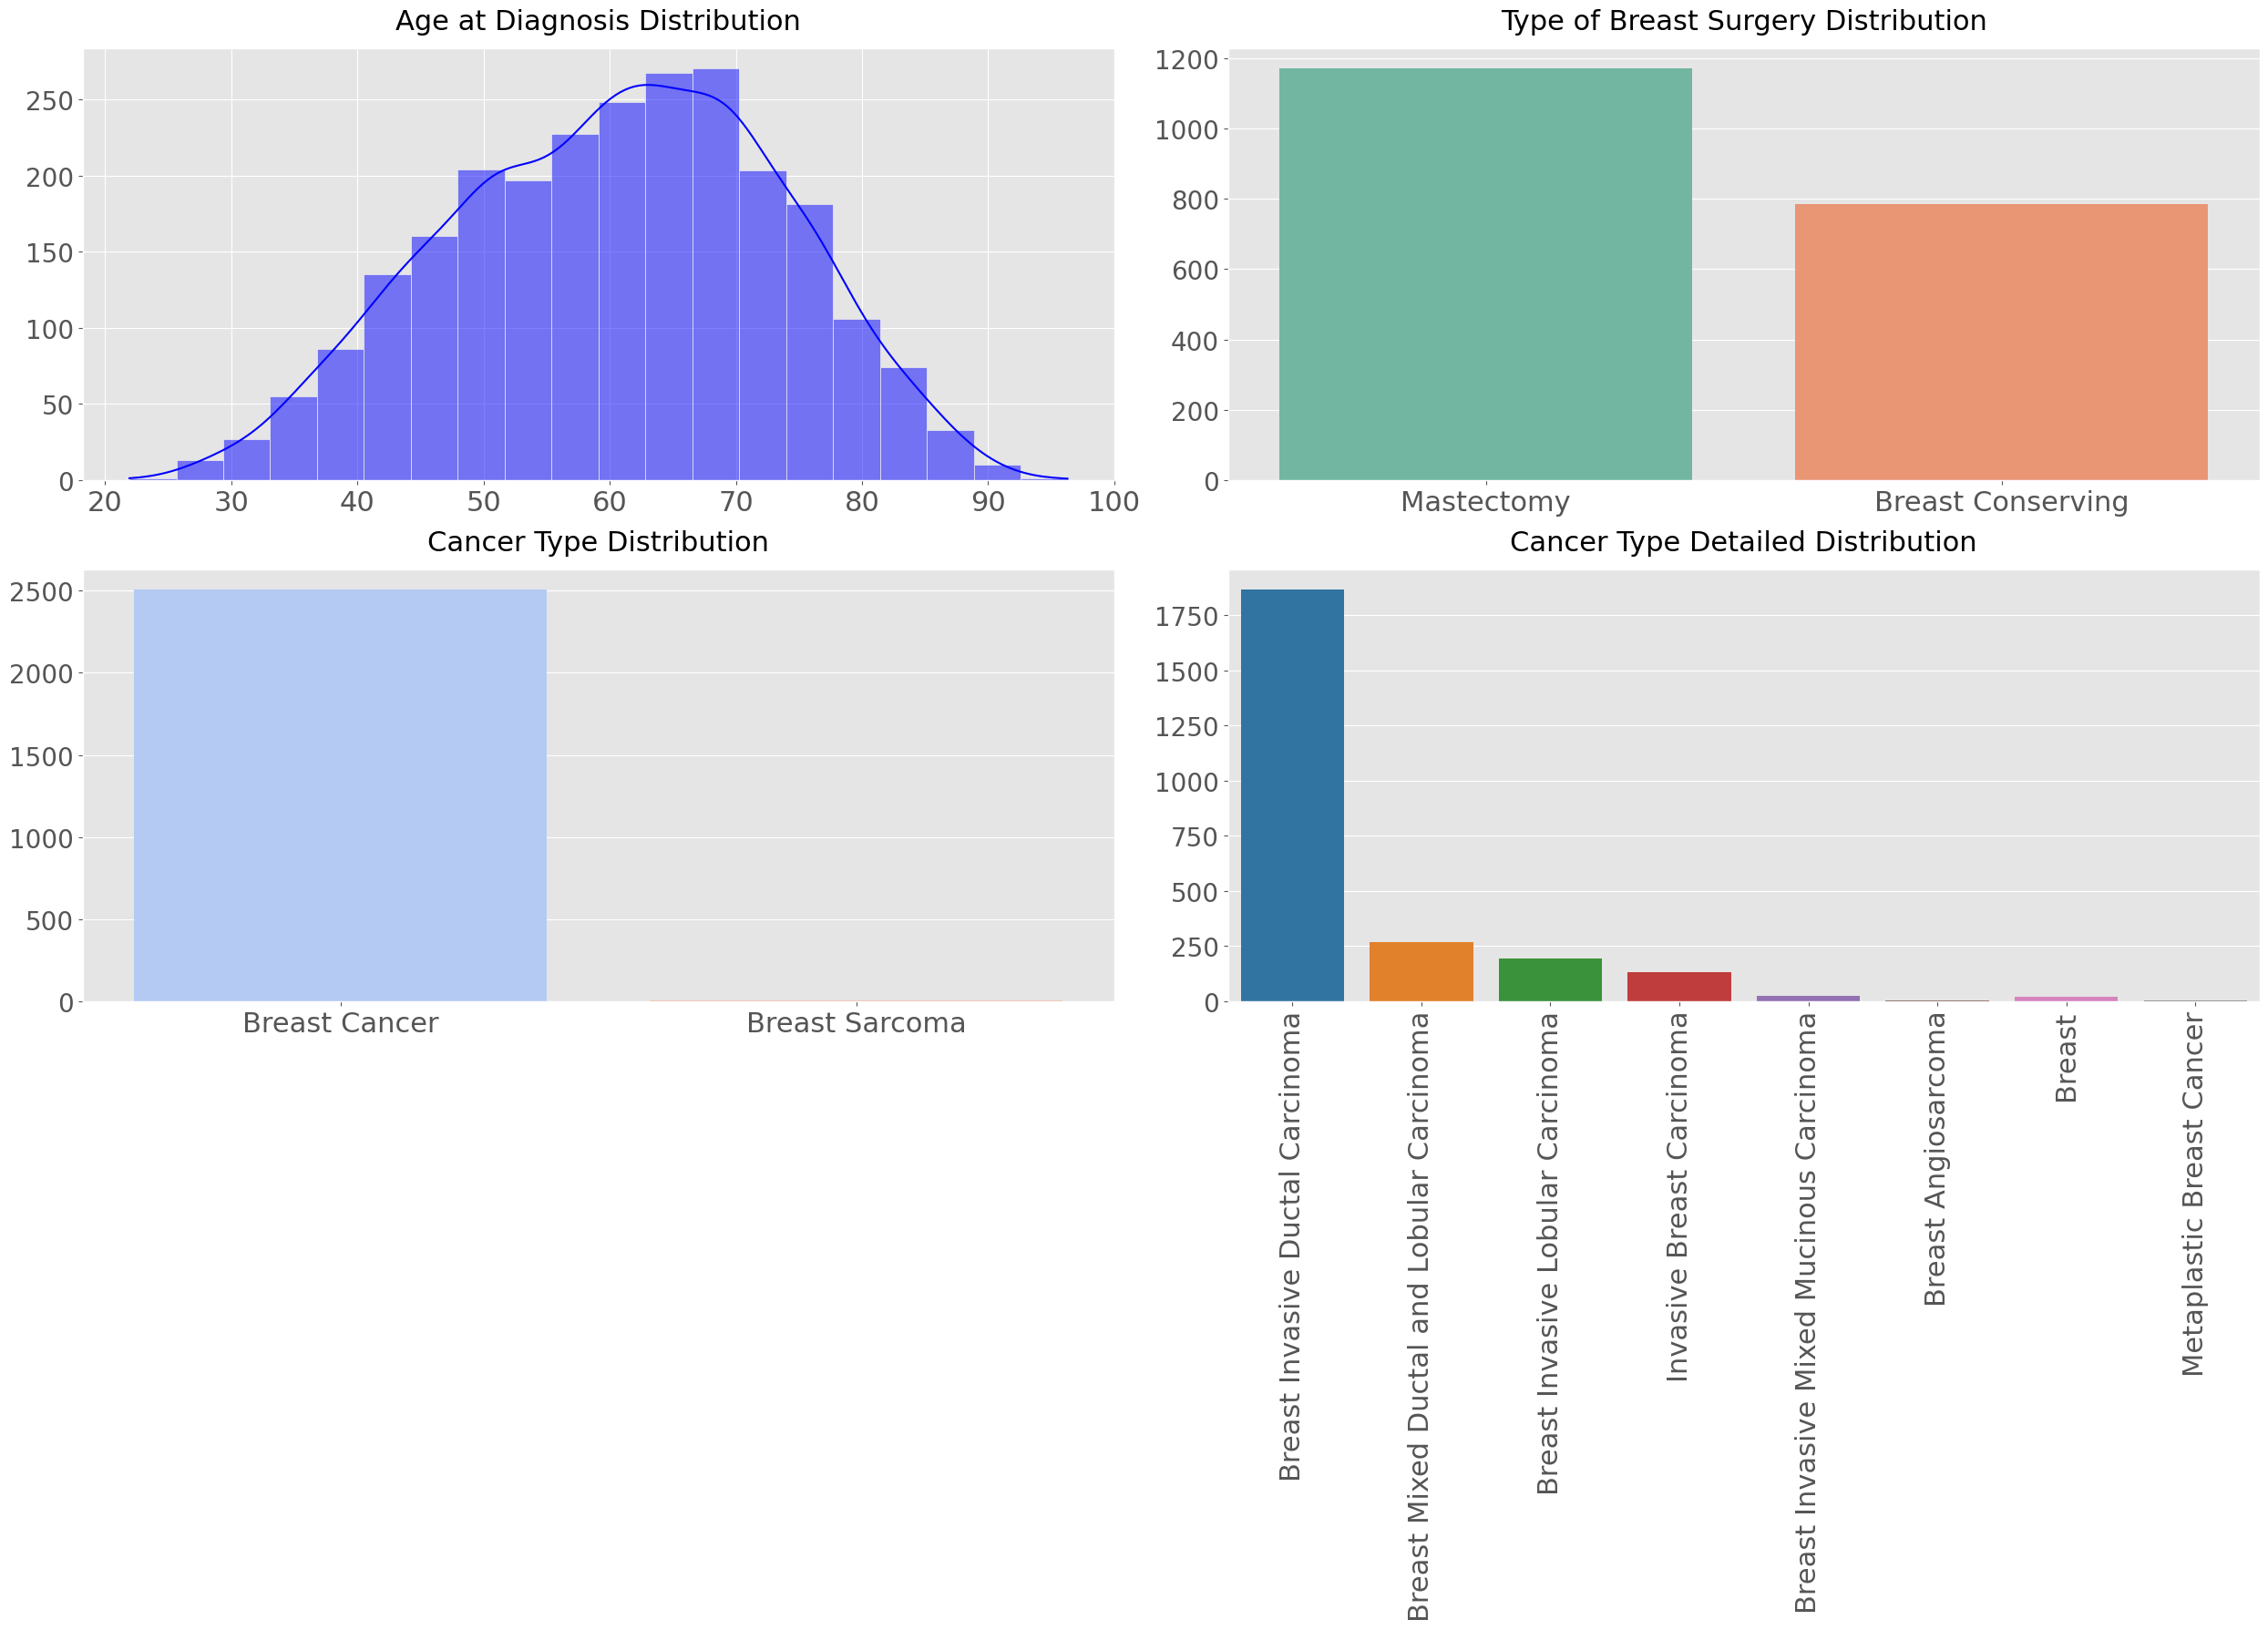

In [9]:
# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(25, 18))

# Plot each subplot
sns.histplot(df_breastcancer["Age at Diagnosis"], kde=True, bins=20, color="blue", ax=axes[0, 0])
sns.countplot(x="Type of Breast Surgery", data=df_breastcancer, palette='Set2', ax=axes[0, 1])
sns.countplot(x="Cancer Type", data=df_breastcancer, palette="coolwarm", ax=axes[1, 0])
sns.countplot(x="Cancer Type Detailed", data=df_breastcancer, palette="tab10", ax=axes[1, 1])

# Remove y-axis labels for better visual appeal
for i in range(2):
    for j in range(2):
        if i == 1 and j == 1:
            axes[i][j].tick_params(axis='x', labelsize=22, rotation=90)
        else:
            axes[i][j].tick_params(axis='x', labelsize=22)
        axes[i][j].tick_params(axis='y', labelsize=20)
        
        axes[i][j].set_xlabel('')
        axes[i][j].set_ylabel('')

# Add titles to each subplot
axes[0][0].set_title('Age at Diagnosis Distribution', size=22, pad=15)
axes[0][1].set_title('Type of Breast Surgery Distribution', size=22, pad=15)
axes[1][0].set_title('Cancer Type Distribution', size=22, pad=15)
axes[1][1].set_title('Cancer Type Detailed Distribution', size=22, pad=15)


plt.tight_layout()
plt.show()

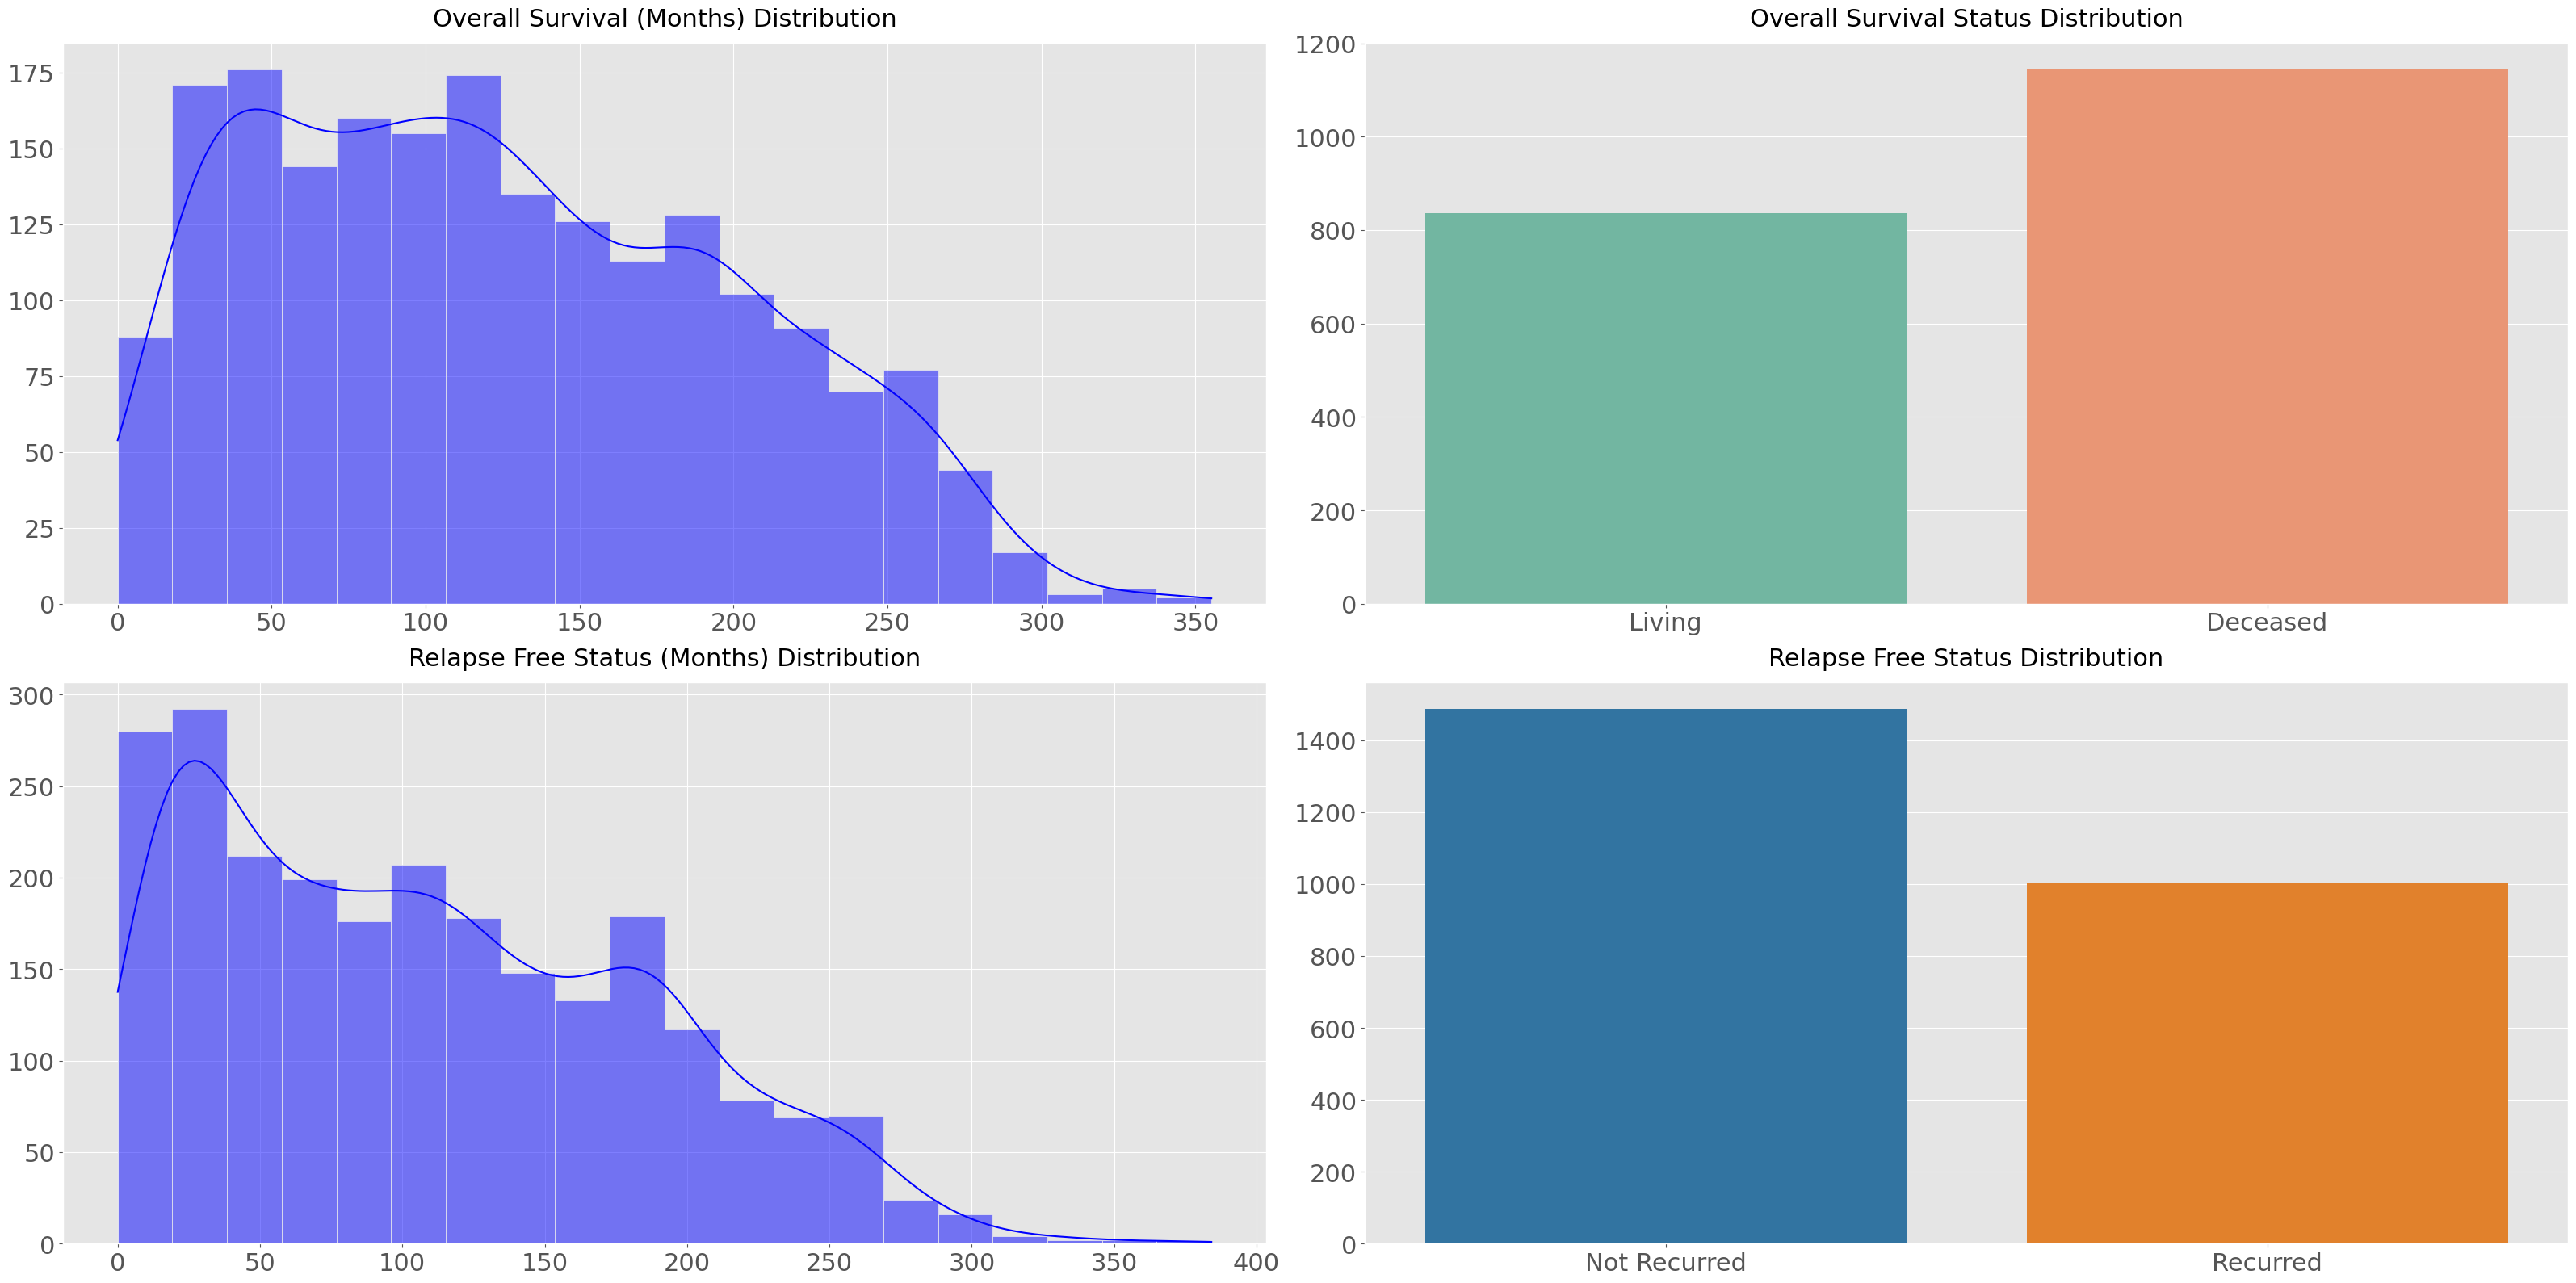

In [10]:
# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(figsize=(32, 16), ncols=2, nrows=2)

# Plot each subplot
sns.histplot(df_breastcancer["Overall Survival (Months)"], kde=True, bins=20, color="blue", ax=axes[0, 0])
sns.countplot(x="Overall Survival Status", data=df_breastcancer, palette='Set2', ax=axes[0, 1])
sns.histplot(df_breastcancer["Relapse Free Status (Months)"],kde=True, bins=20, color="blue", ax=axes[1, 0])
sns.countplot(x="Relapse Free Status", data=df_breastcancer, palette="tab10", ax=axes[1, 1])

# Remove y-axis labels for better visual appeal
for i in range(2):
    for j in range(2):
        if i == 1 and j == 1:
            axes[i][j].tick_params(axis='x', labelsize=22)
        else:
            axes[i][j].tick_params(axis='x', labelsize=22)
        axes[i][j].tick_params(axis='y', labelsize=22)
        
        axes[i][j].set_xlabel('')
        axes[i][j].set_ylabel('')

# Add titles to each subplot
axes[0][0].set_title('Overall Survival (Months) Distribution', size=22, pad=15)
axes[0][1].set_title('Overall Survival Status Distribution', size=22, pad=15)
axes[1][0].set_title('Relapse Free Status (Months) Distribution', size=22, pad=15)
axes[1][1].set_title('Relapse Free Status Distribution', size=22, pad=15)


plt.tight_layout()
plt.show()

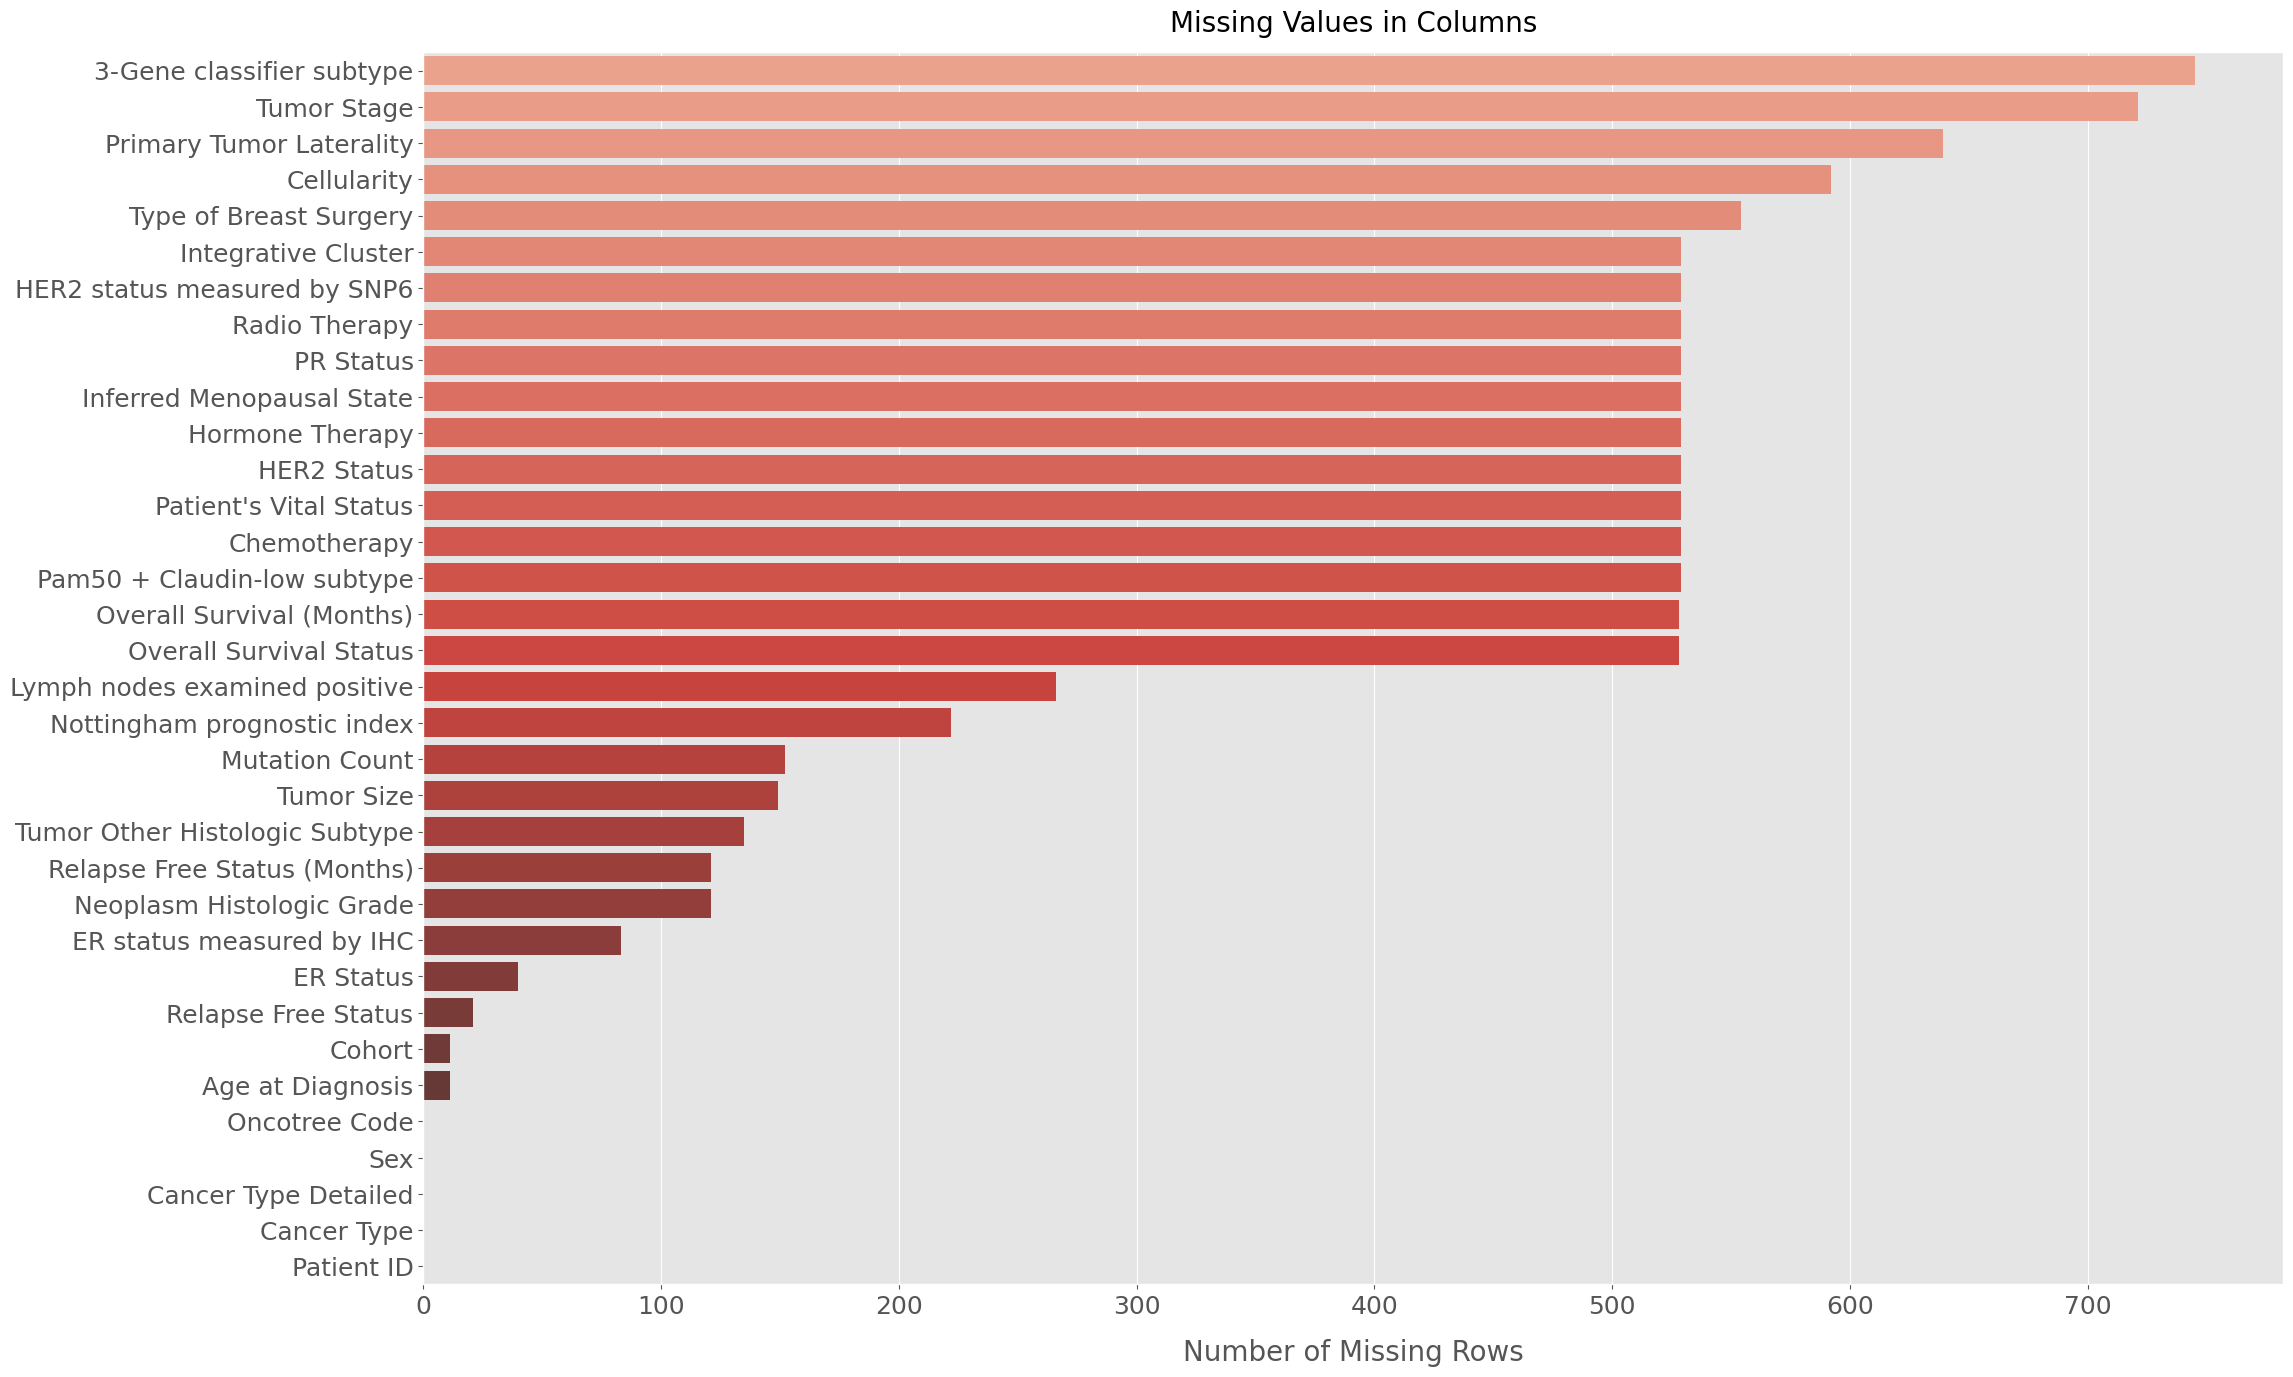

In [11]:
data_numeric = df_breastcancer.select_dtypes('number')
fig = plt.figure(figsize=(24, 16))
sns.barplot(x=df_breastcancer.isnull().sum().sort_values(ascending=False).values,
            y=df_breastcancer.isnull().sum().sort_values(ascending=False).index,
            palette='Reds_d')
plt.xlabel('Number of Missing Rows', size=20, labelpad=15)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.title('Missing Values in Columns', size=20, pad=15)
plt.show()

<a id="preprocessing"></a>
# <p style="background-color:#012D86; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

In [12]:
df_breastcancer['Sex'].value_counts(dropna = False)

Sex
Female    2509
Name: count, dtype: int64

In [13]:
df_breastcancer.drop(["Patient ID","Sex"],axis=1,inplace = True)

In [14]:
df_breastcancer.isnull().sum()

Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         529
Radio Therapy                     529
Relapse Free

In [15]:
df_nulls = pd.DataFrame((df_breastcancer.isna().sum()/len(df_breastcancer))*100 ).reset_index()
df_nulls.columns = ['ColumnName' , 'Count']
df_nulls

ColumnName      Count
0                 Age at Diagnosis   0.438422
1           Type of Breast Surgery  22.080510
2                      Cancer Type   0.000000
3             Cancer Type Detailed   0.000000
4                      Cellularity  23.595058
5                     Chemotherapy  21.084097
6      Pam50 + Claudin-low subtype  21.084097
7                           Cohort   0.438422
8        ER status measured by IHC   3.308091
9                        ER Status   1.594261
10       Neoplasm Histologic Grade   4.822639
11    HER2 status measured by SNP6  21.084097
12                     HER2 Status  21.084097
13  Tumor Other Histologic Subtype   5.380630
14                 Hormone Therapy  21.084097
15       Inferred Menopausal State  21.084097
16             Integrative Cluster  21.084097
17        Primary Tumor Laterality  25.468314
18   Lymph nodes examined positive  10.601833
19                  Mutation Count   6.058191
20     Nottingham prognostic index   8.848147
21                   Oncotree Code   0.000000
22       Overall Survival (Months)  21.044241
23         Overall Survival Status  21.044241
24                       PR Status  21.084097
25                   Radio Therapy  21.084097
26    Relapse Free Status (Months)   4.822639
27             Relapse Free Status   0.836987
28       3-Gene classifier subtype  29.693105
29                      Tumor Size   5.938621
30                     Tumor Stage  28.736548
31          Patient's Vital Status  21.084097

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputed_data = imputer.fit_transform(df_breastcancer)
df_metabric_imputed = pd.DataFrame(imputed_data, columns=df_breastcancer.columns)
df_breastcancer = df_metabric_imputed

In [17]:
df_breastcancer.isnull().sum()

Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)      0
Relapse Free Status         

In [18]:
df_breastcancer.dtypes

Age at Diagnosis                  object
Type of Breast Surgery            object
Cancer Type                       object
Cancer Type Detailed              object
Cellularity                       object
Chemotherapy                      object
Pam50 + Claudin-low subtype       object
Cohort                            object
ER status measured by IHC         object
ER Status                         object
Neoplasm Histologic Grade         object
HER2 status measured by SNP6      object
HER2 Status                       object
Tumor Other Histologic Subtype    object
Hormone Therapy                   object
Inferred Menopausal State         object
Integrative Cluster               object
Primary Tumor Laterality          object
Lymph nodes examined positive     object
Mutation Count                    object
Nottingham prognostic index       object
Oncotree Code                     object
Overall Survival (Months)         object
Overall Survival Status           object
PR Status       

In [19]:
object_cols = ['Age at Diagnosis','Cohort','Neoplasm Histologic Grade','Lymph nodes examined positive','Mutation Count', 'Nottingham prognostic index','Overall Survival (Months)','Relapse Free Status (Months)','Tumor Size','Tumor Stage']
for col in object_cols:
    df_breastcancer[col] = df_breastcancer[col].astype(float)

In [20]:
df_breastcancer.dtypes

Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                            float64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Code                      object
Overall Survival (Months)         float64
Overall Survival Status           

In [21]:
breastcancer = df_breastcancer[df_breastcancer.duplicated()]
breastcancer

Age at Diagnosis Type of Breast Surgery    Cancer Type  \
2144              45.0             Mastectomy  Breast Cancer   
2307              43.0             Mastectomy  Breast Cancer   
2320              45.0             Mastectomy  Breast Cancer   
2324              45.0             Mastectomy  Breast Cancer   
2496              45.0             Mastectomy  Breast Cancer   
2508              45.0             Mastectomy  Breast Cancer   

                  Cancer Type Detailed Cellularity Chemotherapy  \
2144         Invasive Breast Carcinoma        High           No   
2307  Breast Invasive Ductal Carcinoma        High           No   
2320         Invasive Breast Carcinoma        High           No   
2324         Invasive Breast Carcinoma        High           No   
2496         Invasive Breast Carcinoma        High           No   
2508         Invasive Breast Carcinoma        High           No   

     Pam50 + Claudin-low subtype  Cohort ER status measured by IHC ER Status  \
2144                        LumA     1.0                   Positve  Positive   
2307                        LumA     7.0                   Positve  Positive   
2320                        LumA     1.0                   Positve  Positive   
2324                        LumA     1.0                   Positve  Positive   
2496                        LumA     1.0                   Positve  Positive   
2508                        LumA     1.0                   Positve  Positive   

      ...  Overall Survival (Months) Overall Survival Status PR Status  \
2144  ...                      192.2                Deceased  Positive   
2307  ...                      192.2                Deceased  Positive   
2320  ...                      192.2                Deceased  Positive   
2324  ...                      192.2                Deceased  Positive   
2496  ...                      192.2                Deceased  Positive   
2508  ...                      192.2                Deceased  Positive   

     Radio Therapy Relapse Free Status (Months) Relapse Free Status  \
2144           Yes                        27.63        Not Recurred   
2307           Yes                        27.63        Not Recurred   
2320           Yes                        27.63        Not Recurred   
2324           Yes                        27.63        Not Recurred   
2496           Yes                        27.63        Not Recurred   
2508           Yes                        27.63        Not Recurred   

     3-Gene classifier subtype Tumor Size  Tumor Stage  Patient's Vital Status  
2144      ER+/HER2- Low Prolif       20.0          0.0                  Living  
2307      ER+/HER2- Low Prolif       20.0          2.0                  Living  
2320      ER+/HER2- Low Prolif       20.0          0.0                  Living  
2324      ER+/HER2- Low Prolif       20.0          0.0                  Living  
2496      ER+/HER2- Low Prolif       20.0          0.0                  Living  
2508      ER+/HER2- Low Prolif       20.0          0.0                  Living  

[6 rows x 32 columns]

In [22]:
df_breastcancer.drop([2144,2307,2320,2324,2496,2508], axis=0, inplace=True)

In [23]:
breastcancer = df_breastcancer[df_breastcancer.duplicated()]
breastcancer

Empty DataFrame
Columns: [Age at Diagnosis, Type of Breast Surgery, Cancer Type, Cancer Type Detailed, Cellularity, Chemotherapy, Pam50 + Claudin-low subtype, Cohort, ER status measured by IHC, ER Status, Neoplasm Histologic Grade, HER2 status measured by SNP6, HER2 Status, Tumor Other Histologic Subtype, Hormone Therapy, Inferred Menopausal State, Integrative Cluster, Primary Tumor Laterality, Lymph nodes examined positive, Mutation Count, Nottingham prognostic index, Oncotree Code, Overall Survival (Months), Overall Survival Status, PR Status, Radio Therapy, Relapse Free Status (Months), Relapse Free Status, 3-Gene classifier subtype, Tumor Size, Tumor Stage, Patient's Vital Status]
Index: []

[0 rows x 32 columns]

In [24]:
df_breastcancer['Tumor Size'].value_counts(dropna = False)

Tumor Size
20.00     412
25.00     204
15.00     186
30.00     185
18.00      86
35.00      83
22.00      82
40.00      80
16.00      70
17.00      67
50.00      61
23.00      60
21.00      59
10.00      54
26.00      54
13.00      51
14.00      44
27.00      43
19.00      43
12.00      42
28.00      41
45.00      33
24.00      31
60.00      23
11.00      23
31.00      20
29.00      19
55.00      17
32.00      17
34.00      16
37.00      13
33.00      12
39.00      11
9.00       11
65.00      11
1.00       10
80.00      10
8.00        9
70.00       9
38.00       9
36.00       8
5.00        7
47.00       7
46.00       6
43.00       6
42.00       6
48.00       6
7.00        5
3.00        5
75.00       5
53.00       5
51.00       5
100.00      4
99.00       4
6.00        4
2.00        4
57.00       4
62.00       3
15.50       3
44.00       3
49.00       3
4.00        3
130.00      3
12.50       2
24.40       2
21.50       2
41.00       2
52.00       2
90.00       2
61.00       2
22.50    

In [24]:
df_breastcancer['Overall Survival Status'] = df_breastcancer['Overall Survival Status'].map({'Living': 0, 'Deceased': 1}).astype(int)
df_breastcancer['Relapse Free Status'] = df_breastcancer['Relapse Free Status'].map({'Not Recurred': 0, 'Recurred': 1}).astype(int)

<a id="preprocessing"></a>
# <p style="background-color:#012D86; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Feature Scaling</p>

In [25]:
df_breastcancer['10_year_outcome'] = (df_breastcancer['Overall Survival (Months)'] <= 120) & (df_breastcancer["Overall Survival Status"] == 1)

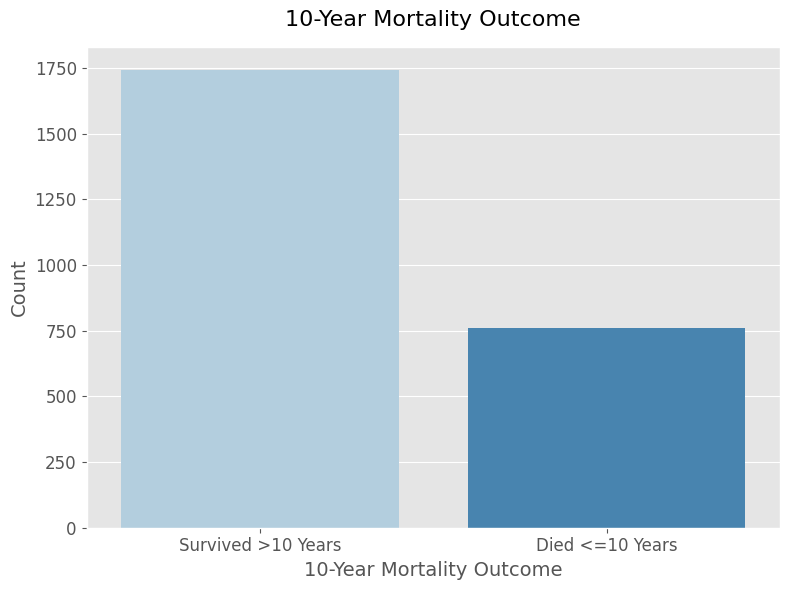

In [26]:
plt.figure(figsize=(8, 6))  # Adjust figure size for readability
sns.countplot(x='10_year_outcome', data=df_breastcancer, palette='Blues')

# Add titles and labels
plt.title("10-Year Mortality Outcome", fontsize=16, pad=15)
plt.xlabel("10-Year Mortality Outcome", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ['Survived >10 Years', 'Died <=10 Years'], fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

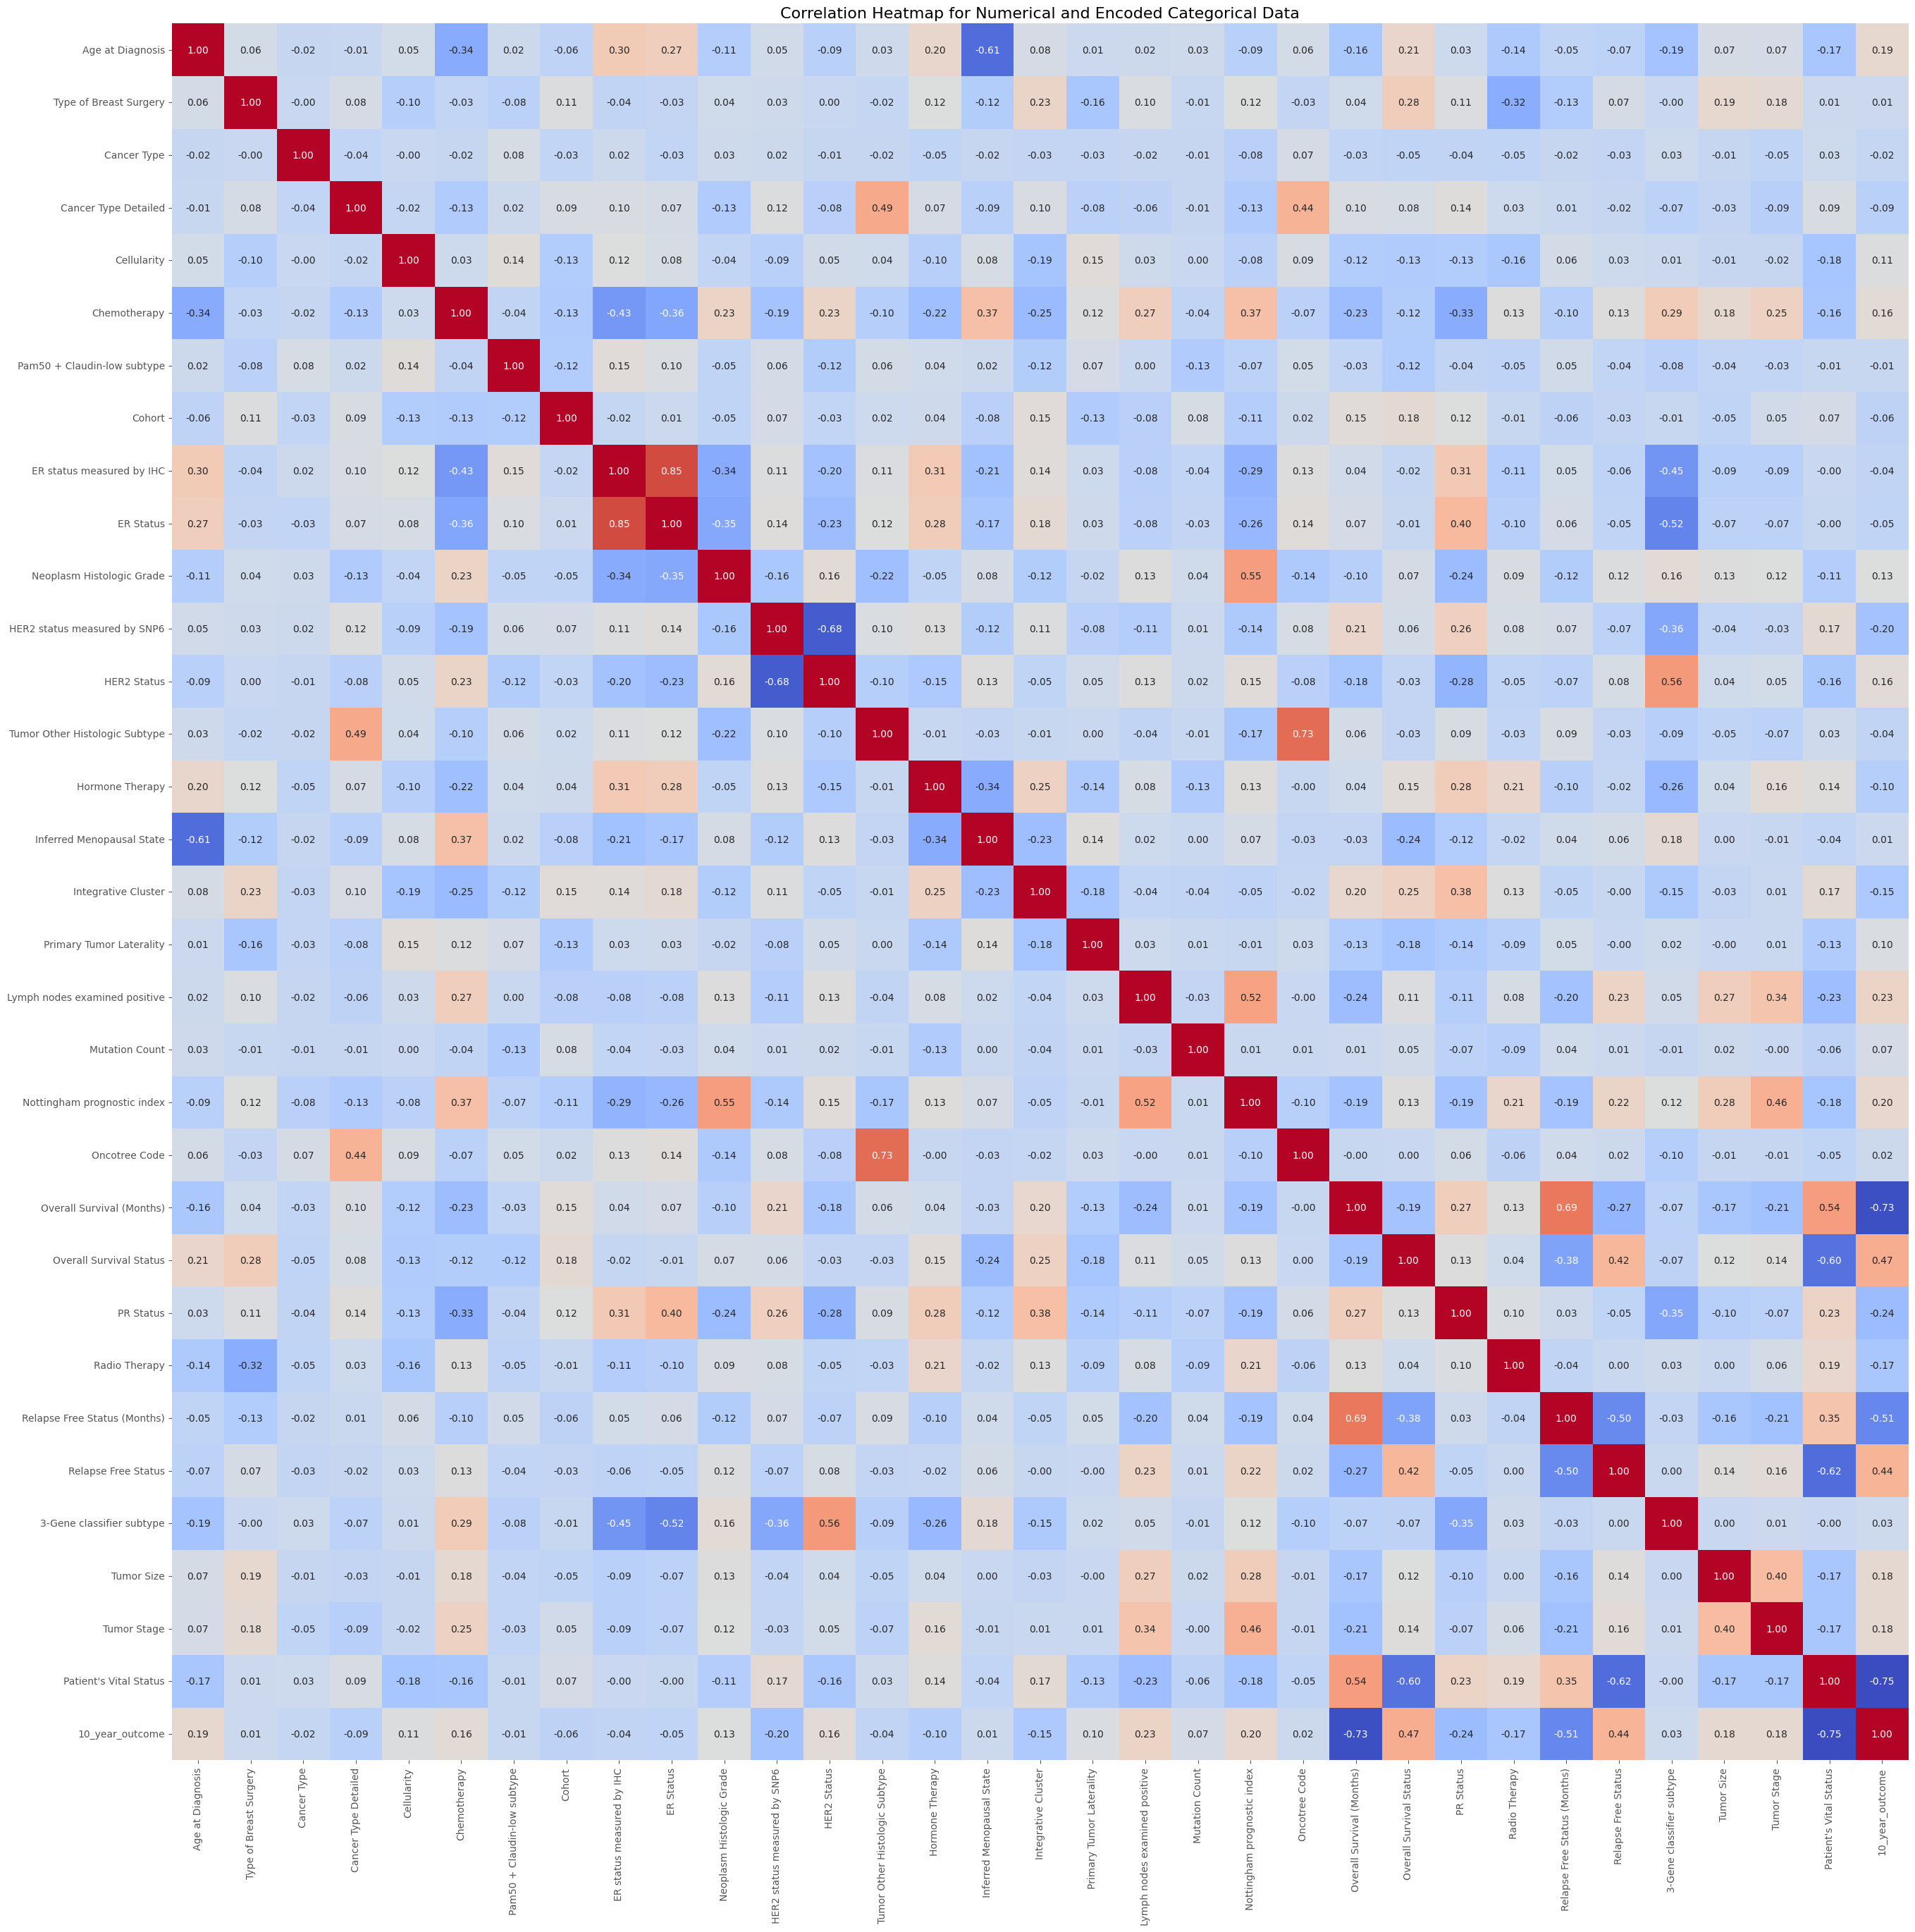

In [27]:
df_encoded = df_breastcancer.copy()
categorical_columns = df_breastcancer.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Compute the correlation matrix
combined_correlation = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(35, 32))
sns.heatmap(combined_correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=False)
plt.title('Correlation Heatmap for Numerical and Encoded Categorical Data', fontsize=16)
plt.show()

In [28]:
correlations = df_encoded.corr()
correlation_variable1 = []
correlation_variable2 = []
correlation_values = []

for i in correlations.columns:
    for j in correlations.index:
        if i != j:
            correlation_variable1.append(i)
            correlation_variable2.append(j)
            correlation_values.append(correlations.loc[i, j])

correlation_df = pd.DataFrame({
    'Var1': correlation_variable1,
    'Var2': correlation_variable2,
    'Correlation': correlation_values
})
correlation_df = correlation_df.sort_values(by='Correlation')
correlation_df = correlation_df.query("Var1 != '' and Var1 == '10_year_outcome'")
correlation_df['Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df[1:15]

In [29]:
correlation_df

Var1                            Var2  Correlation
1046  10_year_outcome       Overall Survival (Months)     0.728832
1050  10_year_outcome    Relapse Free Status (Months)     0.506631
1048  10_year_outcome                       PR Status     0.241463
1035  10_year_outcome    HER2 status measured by SNP6     0.198677
1049  10_year_outcome                   Radio Therapy     0.167238
1040  10_year_outcome             Integrative Cluster     0.154774
1038  10_year_outcome                 Hormone Therapy     0.101925
1027  10_year_outcome            Cancer Type Detailed     0.087426
1031  10_year_outcome                          Cohort     0.060515
1033  10_year_outcome                       ER Status     0.048613
1037  10_year_outcome  Tumor Other Histologic Subtype     0.043118
1032  10_year_outcome       ER status measured by IHC     0.038647
1026  10_year_outcome                     Cancer Type     0.022874
1030  10_year_outcome     Pam50 + Claudin-low subtype     0.008259

In [30]:
df_target = df_breastcancer['10_year_outcome'].astype('int32')
df_feature = df_breastcancer.drop(['10_year_outcome','Overall Survival (Months)', 'Overall Survival Status'],axis = 1)

In [31]:
df_target

0       0
1       0
2       0
3       0
4       1
5       1
6       0
7       1
8       1
9       0
10      1
11      1
12      0
13      0
14      0
15      1
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      1
29      0
30      1
31      0
32      1
33      0
34      0
35      1
36      0
37      0
38      0
39      0
40      1
41      1
42      0
43      0
44      1
45      0
46      0
47      1
48      0
49      0
50      1
51      1
52      0
53      0
54      1
55      0
56      0
57      0
58      0
59      0
60      1
61      0
62      1
63      0
64      1
65      0
66      0
67      0
68      0
69      0
70      0
71      1
72      0
73      0
74      0
75      1
76      0
77      1
78      0
79      1
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      1
91      0
92      1
93      0
94      1
95      0
96      0
97      1
98      0
99      0


In [32]:
df_feature

Age at Diagnosis Type of Breast Surgery     Cancer Type  \
0                75.65             Mastectomy   Breast Cancer   
1                43.19      Breast Conserving   Breast Cancer   
2                48.87             Mastectomy   Breast Cancer   
3                47.68             Mastectomy   Breast Cancer   
4                76.97             Mastectomy   Breast Cancer   
5                78.77             Mastectomy   Breast Cancer   
6                56.45      Breast Conserving   Breast Cancer   
7                70.00             Mastectomy   Breast Cancer   
8                89.08      Breast Conserving   Breast Cancer   
9                76.24             Mastectomy   Breast Cancer   
10               86.41      Breast Conserving   Breast Cancer   
11               84.22             Mastectomy   Breast Cancer   
12               85.49             Mastectomy   Breast Cancer   
13               70.91      Breast Conserving   Breast Cancer   
14               45.27             Mastectomy   Breast Cancer   
15               83.02             Mastectomy   Breast Cancer   
16               51.46      Breast Conserving   Breast Cancer   
17               44.64      Breast Conserving   Breast Cancer   
18               70.02      Breast Conserving   Breast Cancer   
19               66.91             Mastectomy   Breast Cancer   
20               62.62             Mastectomy   Breast Cancer   
21               75.58             Mastectomy   Breast Cancer   
22               45.43      Breast Conserving   Breast Cancer   
23               52.14             Mastectomy   Breast Cancer   
24               69.13      Breast Conserving   Breast Cancer   
25               61.49      Breast Conserving   Breast Cancer   
26               51.01      Breast Conserving   Breast Cancer   
27               68.42             Mastectomy   Breast Cancer   
28               50.42             Mastectomy   Breast Cancer   
29               49.61      Breast Conserving   Breast Cancer   
30               64.85      Breast Conserving   Breast Cancer   
31               43.55      Breast Conserving   Breast Cancer   
32               80.50             Mastectomy   Breast Cancer   
33               78.19             Mastectomy   Breast Cancer   
34               51.58      Breast Conserving   Breast Cancer   
35               68.68             Mastectomy   Breast Cancer   
36               46.89             Mastectomy   Breast Cancer   
37               51.38             Mastectomy   Breast Cancer   
38               49.87             Mastectomy   Breast Cancer   
39               65.59             Mastectomy   Breast Cancer   
40               43.15      Breast Conserving   Breast Cancer   
41               82.53             Mastectomy   Breast Cancer   
42               45.73      Breast Conserving   Breast Cancer   
43               54.23             Mastectomy   Breast Cancer   
44               83.89             Mastectomy   Breast Cancer   
45               36.96             Mastectomy   Breast Cancer   
46               48.59             Mastectomy   Breast Cancer   
47               39.84             Mastectomy   Breast Cancer   
48               42.55             Mastectomy   Breast Cancer   
49               60.07      Breast Conserving   Breast Cancer   
50               82.73             Mastectomy   Breast Cancer   
51               72.10             Mastectomy   Breast Cancer   
52               78.73             Mastectomy   Breast Cancer   
53               58.95      Breast Conserving   Breast Cancer   
54               76.89             Mastectomy   Breast Cancer   
55               43.46      Breast Conserving   Breast Cancer   
56               73.98      Breast Conserving   Breast Cancer   
57               61.95             Mastectomy   Breast Cancer   
58               52.11      Breast Conserving   Breast Cancer   
59               57.40      Breast Conserving   Breast Cancer   
60               63.53             Mastec

In [33]:
df_num = df_feature.select_dtypes(include = np.number)
df_num.columns

Index(['Age at Diagnosis', 'Cohort', 'Neoplasm Histologic Grade',
       'Lymph nodes examined positive', 'Mutation Count',
       'Nottingham prognostic index', 'Relapse Free Status (Months)',
       'Relapse Free Status', 'Tumor Size', 'Tumor Stage'],
      dtype='object')

In [34]:
df_cat = df_feature.select_dtypes(include = [object])
df_cat.columns

Index(['Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype',
       'ER status measured by IHC', 'ER Status',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Oncotree Code', 'PR Status',
       'Radio Therapy', '3-Gene classifier subtype', 'Patient's Vital Status'],
      dtype='object')

In [35]:
dummy_var = pd.get_dummies(data = df_cat, drop_first = True, dtype = 'int8')

In [36]:
X = pd.concat([df_num, dummy_var],axis = 1)
X.head()

Age at Diagnosis  Cohort  Neoplasm Histologic Grade  \
0             75.65     1.0                        3.0   
1             43.19     1.0                        3.0   
2             48.87     1.0                        2.0   
3             47.68     1.0                        2.0   
4             76.97     1.0                        3.0   

   Lymph nodes examined positive  Mutation Count  Nottingham prognostic index  \
0                           10.0             5.0                        6.044   
1                            0.0             2.0                        4.020   
2                            1.0             2.0                        4.030   
3                            3.0             1.0                        4.050   
4                            8.0             2.0                        6.080   

   Relapse Free Status (Months)  Relapse Free Status  Tumor Size  Tumor Stage  \
0                        138.65                    0        22.0          2.0   
1                         83.52                    0        10.0          1.0   
2                        151.28                    1        15.0          2.0   
3                        162.76                    0        25.0          2.0   
4                         18.55                    1        40.0          2.0   

   ...  Oncotree Code_MBC  Oncotree Code_MDLC  Oncotree Code_PBS  \
0  ...                  0                   0                  0   
1  ...                  0                   0                  0   
2  ...                  0                   0                  0   
3  ...                  0                   1                  0   
4  ...                  0                   1                  0   

   PR Status_Positive  Radio Therapy_Yes  \
0                   0                  1   
1                   1                  1   
2                   1                  0   
3                   1                  1   
4                   1                  1   

   3-Gene classifier subtype_ER+/HER2- Low Prolif  \
0                                               0   
1                                               0   
2                                               1   
3                                               1   
4                                               0   

   3-Gene classifier subtype_ER-/HER2-  3-Gene classifier subtype_HER2+  \
0                                    1                                0   
1                                    0                                0   
2                                    0                                0   
3                                    0                                0   
4                                    0                                0   

   Patient's Vital Status_Died of Other Causes  Patient's Vital Status_Living  
0                                            0                              1  
1                                            0                              1  
2                                            0                              0  
3                                            0                              1  
4                                            0                              0  

[5 rows x 68 columns]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 42, test_size = 0.2)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (2002, 68)
X_test (501, 68)
y_train (2002,)
y_test (501,)


In [38]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [39]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test,test_pred))

In [40]:
def get_rocauc_train_report(model):
    train_pred = model.predict(X_train)
    return(roc_auc_score(y_train, train_pred))

In [41]:
def get_rocauc_test_report(model):
    test_pred = model.predict(X_test)
    return(roc_auc_score(y_test, test_pred))

In [42]:
def get_confusion_matrix(model):
    test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, test_pred)
    return cm

<a id="preprocessing"></a>
# <p style="background-color:#012D86; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Logistic Regression</p>

In [43]:
logreg_model = LogisticRegression()
logestic_model = logreg_model.fit(X_train,y_train)

In [44]:
train_report = get_train_report(logestic_model)
print('Train Report:\n',train_report)
train_report = get_rocauc_train_report(logestic_model)
print('ROC-AUC:',train_report)

Train Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1401
           1       0.92      0.94      0.93       601

    accuracy                           0.96      2002
   macro avg       0.95      0.95      0.95      2002
weighted avg       0.96      0.96      0.96      2002

ROC-AUC: 0.9518486320087506


In [45]:
test_report = get_test_report(logestic_model)
print('Test Report:\n',test_report)
test_report = get_rocauc_test_report(logestic_model)
print('ROC-AUC:',test_report)

Test Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       342
           1       0.90      0.92      0.91       159

    accuracy                           0.94       501
   macro avg       0.93      0.93      0.93       501
weighted avg       0.94      0.94      0.94       501

ROC-AUC: 0.9342656956857552


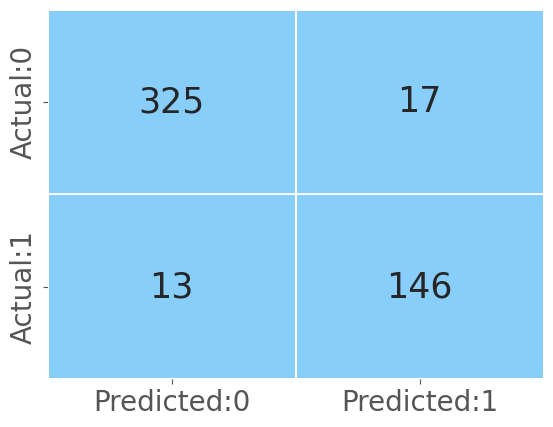

In [46]:
cm = get_confusion_matrix(logreg_model)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

<a id="preprocessing"></a>
# <p style="background-color:#012D86; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | Decision Tree</p>

In [47]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [48]:
train_report = get_train_report(decision_tree)
print('Train Report:\n',train_report)
train_report = get_rocauc_train_report(decision_tree)
print('ROC-AUC:',train_report)

Train Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1401
           1       1.00      1.00      1.00       601

    accuracy                           1.00      2002
   macro avg       1.00      1.00      1.00      2002
weighted avg       1.00      1.00      1.00      2002

ROC-AUC: 1.0


In [49]:
test_report = get_test_report(decision_tree)
print('Test Report:\n',test_report)
test_report = get_rocauc_test_report(decision_tree)
print('ROC-AUC:',test_report)

Test Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       342
           1       0.90      0.91      0.91       159

    accuracy                           0.94       501
   macro avg       0.93      0.93      0.93       501
weighted avg       0.94      0.94      0.94       501

ROC-AUC: 0.9325830299017985


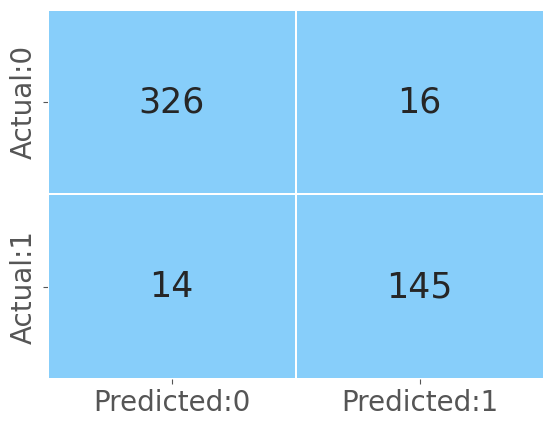

In [50]:
cm = get_confusion_matrix(decision_tree)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

<a id="preprocessing"></a>
# <p style="background-color:#012D86; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 | Random Forest</p>

In [51]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 42) #nestimatore is number of decison tree in random forest
rf_model = rf_classification.fit(X_train,y_train)

In [52]:
train_report = get_train_report(rf_model)
print('Train Report:\n',train_report)
train_report = get_rocauc_train_report(rf_model)
print('ROC-AUC:',train_report)

Train Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1401
           1       1.00      1.00      1.00       601

    accuracy                           1.00      2002
   macro avg       1.00      1.00      1.00      2002
weighted avg       1.00      1.00      1.00      2002

ROC-AUC: 0.998454277370217


In [53]:
test_report = get_test_report(rf_model)
print('Test Report:\n',test_report)
test_report = get_rocauc_test_report(rf_model)
print('ROC-AUC:',train_report)

Test Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       342
           1       0.92      0.94      0.93       159

    accuracy                           0.95       501
   macro avg       0.95      0.95      0.95       501
weighted avg       0.95      0.95      0.95       501

ROC-AUC: 0.998454277370217


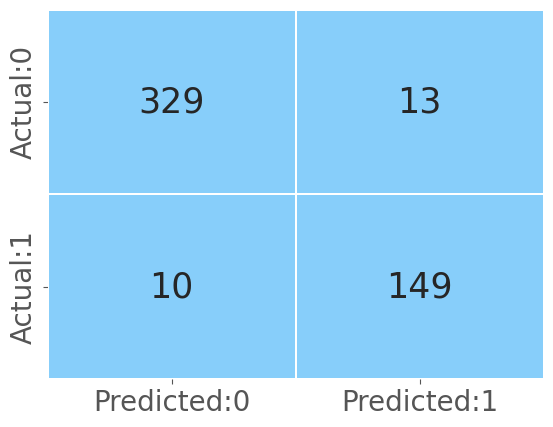

In [54]:
cm = get_confusion_matrix(rf_model)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

<a id="preprocessing"></a>
# <p style="background-color:#012D86; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 10 | SVM</p>

In [55]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
SVM = svm_model.fit(X_train, y_train)

In [56]:
train_report = get_train_report(SVM)
print('Train Report:\n',train_report)
train_report = get_rocauc_train_report(SVM)
print('ROC-AUC:',train_report)

Train Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1401
           1       0.70      0.62      0.66       601

    accuracy                           0.81      2002
   macro avg       0.78      0.76      0.76      2002
weighted avg       0.80      0.81      0.81      2002

ROC-AUC: 0.7559486271393976


In [57]:
test_report = get_test_report(SVM)
print('Test Report:\n',test_report)
test_report = get_rocauc_test_report(SVM)
print('ROC-AUC:',train_report)

Test Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       342
           1       0.68      0.61      0.64       159

    accuracy                           0.79       501
   macro avg       0.76      0.74      0.75       501
weighted avg       0.78      0.79      0.78       501

ROC-AUC: 0.7559486271393976


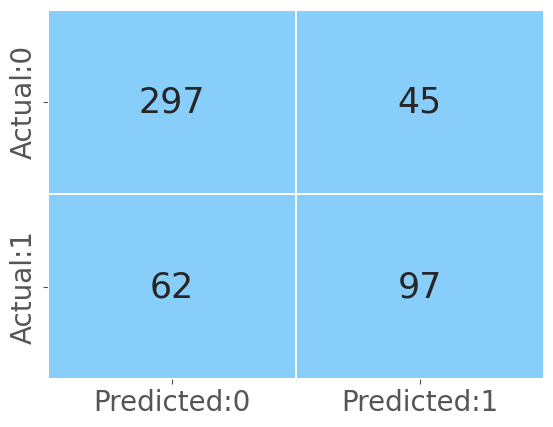

In [58]:
cm = get_confusion_matrix(SVM)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

<a id="preprocessing"></a>
# <p style="background-color:#012D86; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 11 | Kaplan-Meier Survival Curves</p>

In [59]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


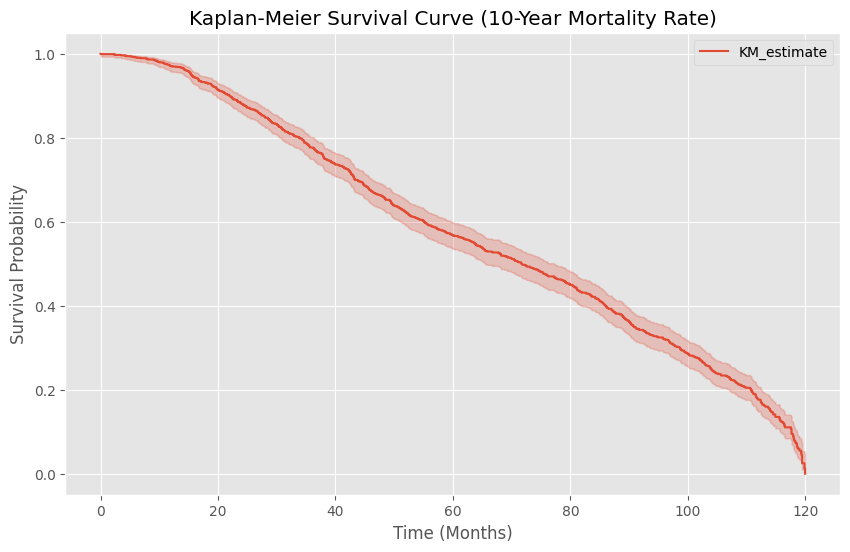

In [60]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
data_10yr = df_breastcancer[df_breastcancer["Overall Survival (Months)"] <= 120]

# Kaplan-Meier Fitting
kmf = KaplanMeierFitter()
kmf.fit(data_10yr["Overall Survival (Months)"], event_observed=data_10yr["Overall Survival Status"])

# Plot the Kaplan-Meier survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve (10-Year Mortality Rate)")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

<a id="preprocessing"></a>
# <p style="background-color:#012D86; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 12 | Cox Proportional Hazards Model</p>

                      coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                         
Age at Diagnosis  0.029586   1.030028  0.002213        0.025248   
Tumor Size        0.010378   1.010432  0.001449        0.007538   
Chemotherapy      0.505001   1.656988  0.079744        0.348707   

                  coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
covariate                                                                    
Age at Diagnosis        0.033924             1.025569             1.034506   
Tumor Size              0.013218             1.007567             1.013306   
Chemotherapy            0.661296             1.417234             1.937302   

                  cmp to          z             p    -log2(p)  
covariate                                                      
Age at Diagnosis     0.0  13.366685  9.466646e-41  132.956199  
Tumor Size           0.0   7.162467  7.923775e-13   40.198877  
Chemotherapy     

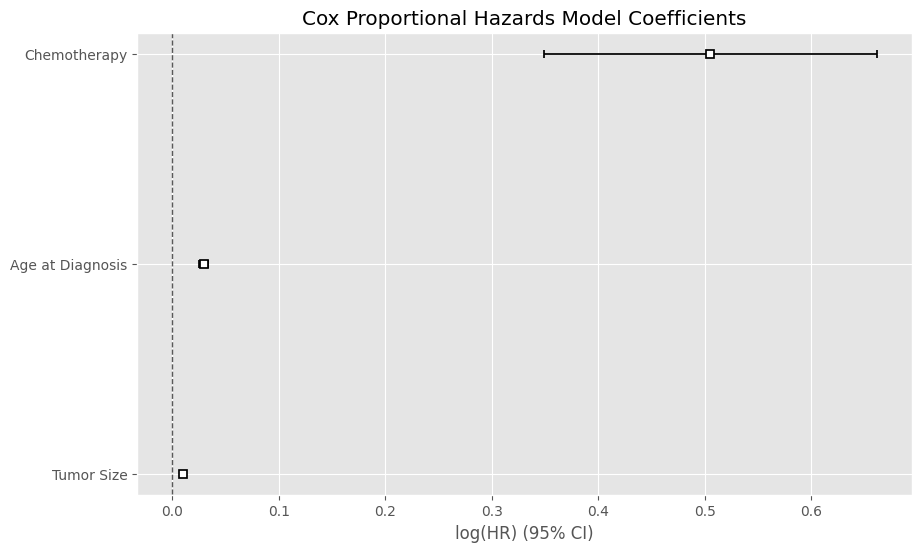

In [61]:
from lifelines import CoxPHFitter
data = df_breastcancer[["Overall Survival (Months)", "Overall Survival Status", "Age at Diagnosis", "Tumor Size", "Chemotherapy"]].copy()
data["Chemotherapy"] = data["Chemotherapy"].apply(lambda x: 1 if x == "Yes" else 0)

# Focus on 10-year survival (120 months)
data_10yr = data[data["Overall Survival (Months)"] <= 120]

# Cox Proportional Hazard Model
cox_model = CoxPHFitter()  # Instantiate the model
cox_model.fit(data, duration_col="Overall Survival (Months)", event_col="Overall Survival Status")  # Fit the model

# Summary of the Cox model
print(cox_model.summary)  # View coefficients and statistical significance

# Visualize the model's coefficients
plt.figure(figsize=(10, 6))
cox_model.plot()
plt.title("Cox Proportional Hazards Model Coefficients")
plt.show()